# Compare image conversion techniques

In our project we were tasked with providing a method to produce readable text in a video. We propose two methods, HSV inversion and Contrast transformation. These two methods are utilized to transform the entire image, where the text will then be masked by the transformed image to produce a text that is readable on top of the original image.

For HSV inversion we transform the images current color space of red green blue, RGB, into a hue saturation value, HSV, color space. Then we flip the values of the HSV space for the entire image using the bitwise not cv2 function. The method is pretty simple and fairly effective in generating readable text on top of the original image.

$$ image_{mask} = {\sim{image}_{hsv}} $$

For the contrast transformation we implement a WCAG method usually used to test the contrast level of text in a browser to produce a contrasting color for each pixel of the original. In our implementation we tranform each color value to a linear color space, where our expected input is a color value from sRGB. We expect that each color value in sRGB is in the range of 0 to 1. This method of transformation is known as the reverse transformation, referred to as $rt(c)$. Below is our function for converting a sRGB color value to Linear.

$$ rt(c) = 
\begin{cases}
0.0002 &\text{if c < 0.0002} \\
\frac{c + 0.055}{1.055}^{2.4} &\text{if c > 0.04045} \\
\frac{c}{12.92} &\text{else} \\
\end{cases}
$$

This converts the color into linear space.

## Experimental Results

Below we compare the outputs of the HSV inversion and Contrast transformation for several different images, most of strict color. We do this as a litmus test for both methods. In each plot we provide the original image on the left, the HSV inversion image in the center, and the Constrast transformation method on the right.

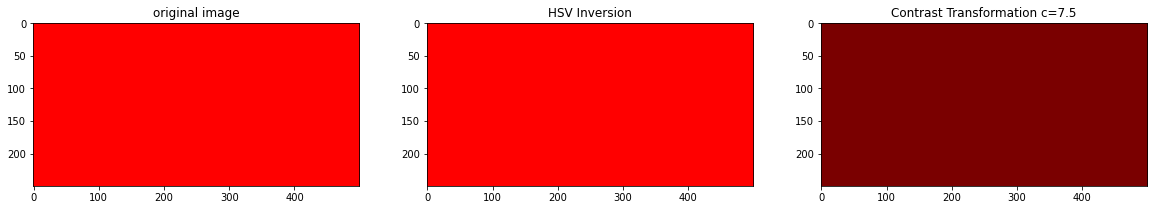

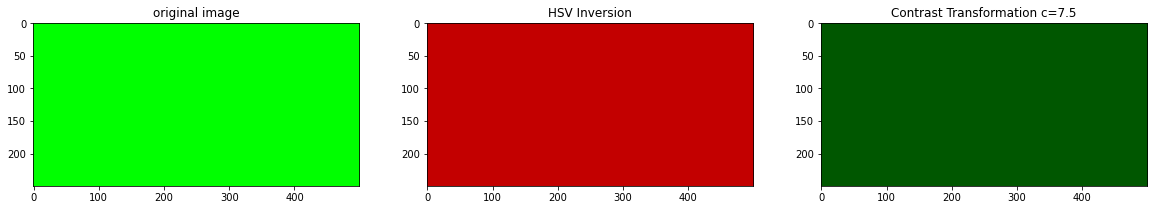

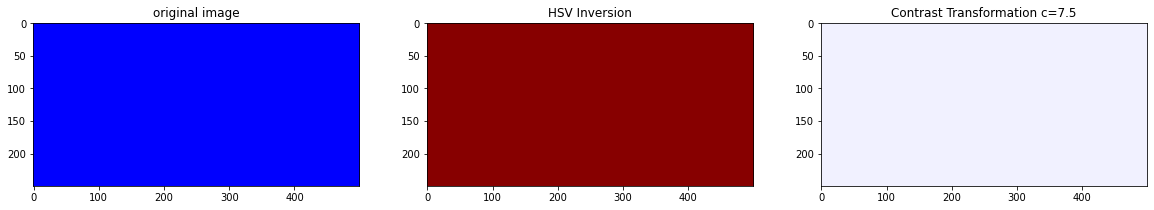

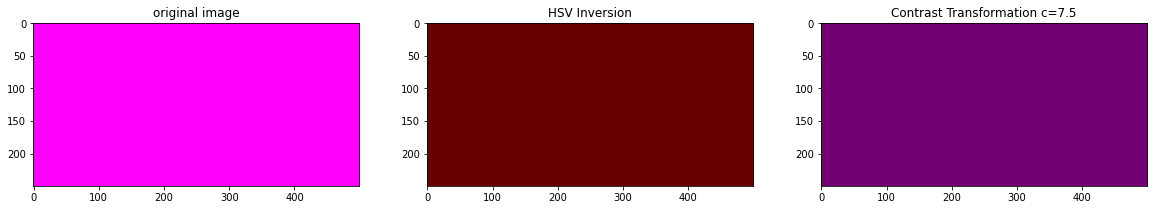

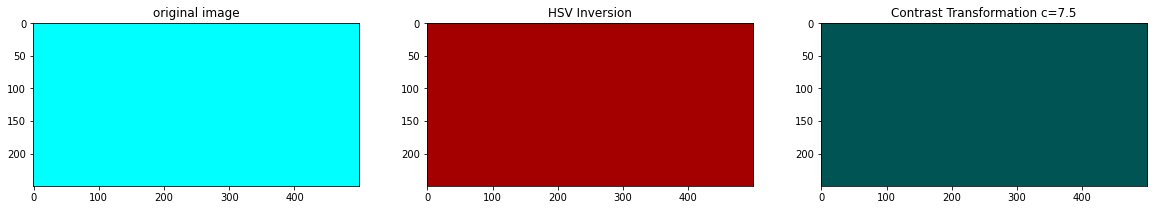

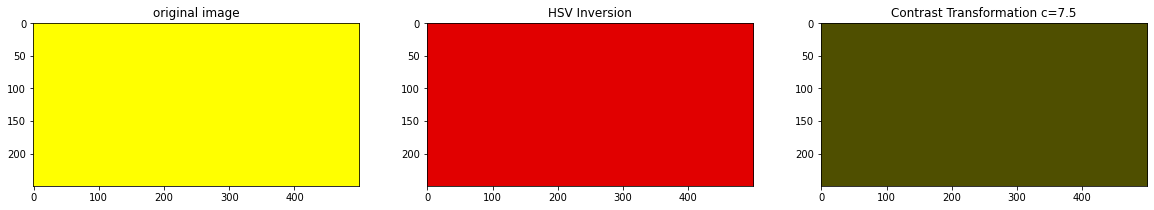

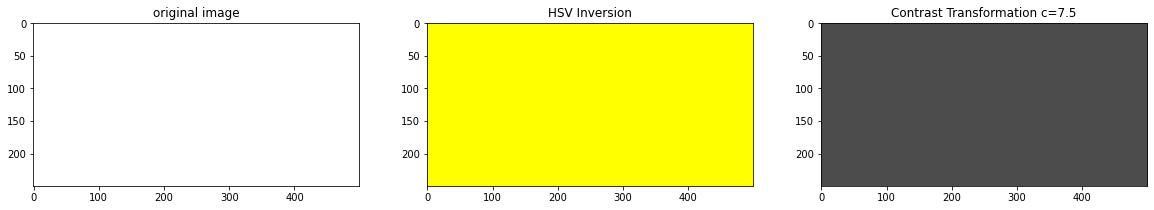

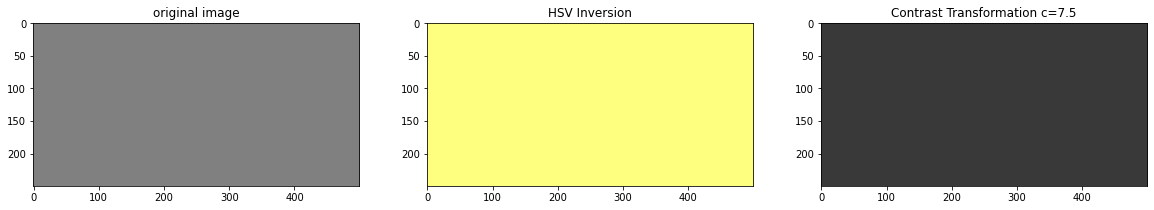

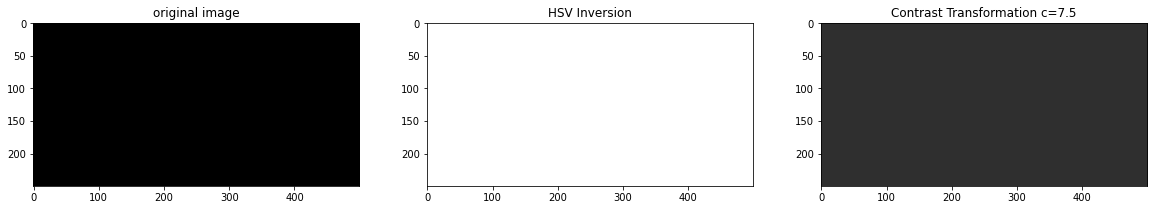

In [19]:
from contrast.convert import Convert
import matplotlib.pyplot as plt
import numpy as np
import cv2

def generateTestImages(size = 250):
    blank_image = np.zeros((size,size*2,3)).astype('uint8')
    red = blank_image.copy();
    red[:,:,0] = 255
    green = blank_image.copy();
    green[:,:,1] = 255
    blue = blank_image.copy();
    blue[:,:,2] = 255
    magenta = blank_image.copy();
    magenta[:,:,0] = 255
    magenta[:,:,2] = 255
    cyan = blank_image.copy();
    cyan[:,:,1] = 255
    cyan[:,:,2] = 255
    yellow = blank_image.copy();
    yellow[:,:,0] = 255
    yellow[:,:,1] = 255
    white = blank_image.copy();
    white[:,:,0] = 255
    white[:,:,1] = 255
    white[:,:,2] = 255
    gray = blank_image.copy();
    gray[:,:,0] = 128
    gray[:,:,1] = 128
    gray[:,:,2] = 128
    black = blank_image.copy();
    return [red, green, blue, magenta, cyan, yellow, white, gray, black]

def getHSVInversion(image):
    return cv2.bitwise_not(cv2.cvtColor(image, cv2.COLOR_RGB2HSV))

def getContrastTransformation(image, contrast = 7.5):
    return Convert().image(image, contrast).astype("uint8")
    
def plotResults(image, hsvInversion, contrastTransformation, contrast = 7.5):
    plt.rcParams["figure.figsize"] = (20,3)
    fig, (axs1, axs2, axs3) = plt.subplots(1,3);
    axs1.set_title("original image")
    axs1.imshow(image);
    axs2.set_title("HSV Inversion")
    axs2.imshow(hsvInversion);
    axs3.set_title(f"Contrast Transformation c={contrast}")
    axs3.imshow(contrastTransformation);
    plt.show();
    
# images = generateTestImages();
# getHSVInversion(images[0].copy())
for image in generateTestImages():
    plotResults(
        image,
        getHSVInversion(image),
        getContrastTransformation(image.copy())
    );
